In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/textmining_rawdata.csv')
df

,year,rank,name,genre,lyricist,lyrics
0,2000,1,아시나요,발라드,강은경,아시나요 얼마나 사랑했는지 그댈 보면 자꾸 눈물이 나서\n차마 그대 바라보지 못하고...
1,2000,2,다 줄거야,발라드,조규만,그대 내게 다가오는 그 모습\r\n자꾸 다시 볼수 없을 것만 같아서\r\n감은 두눈...
2,2000,3,Run To You,"댄스, 랩/힙합","이하늘, 정재용",하나 투 원 투 쓰리 포\r\nBOUNCE with me BOUNCE\r\nwith...
3,2000,4,거짓말,발라드,박진영,미안해\r\n난 니가 싫어졌어 우리\r\n이만 헤어져\r\n다른 여자가 생겼어 너보...
4,2000,5,초련,댄스,김창환,난 그냥 좋았어 니 앞에만 서면\r\n요즘 내가 왜 이러는지 나도 몰라\r\n니 생...
...,...,...,...,...,...,...
455,2022,16,나의 X에게,발라드,"이래언, Rayker Dane, 신수윤",우리 다시 만날래\r\n예쁘게 빛나던\r\n모든 추억들이\r\n너무 그리워\r\n너...
456,2022,17,이제 나만 믿어요,성인가요/트로트,김이나,무얼 믿은 걸까 부족했던 내게서\r\n나조차 못 믿던 내게 여태 머문 사람\r\n무...
457,2022,18,듣고 싶을까,발라드,"DrJO, 원슈타인",우리 함께 듣던 그 노랠 듣고 싶을까\r\n듣고 나서 잠시 날 생각은 할까\r\n아...
458,2022,19,무지개,록/메탈,"김시온, 멧돼지",오늘 하루 어땠었나요\r\n많이 힘들었나요\r\n쉬지 않고 달려왔던 길에서\r\n나...


In [ ]:
df['lyrics'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)

In [ ]:
df['lyricist'].value_counts()

박진영         15
안영민         11
TEDDY       11
아이유         10
조은희          9
            ..
송수윤          1
에이맨          1
김C           1
한성호          1
김시온, 멧돼지     1
Name: lyricist, Length: 262, dtype: int64

In [ ]:
park = df[df["lyricist"].str.contains("박진영")]
GD = df[df["lyricist"].str.contains("G-DRAGON")]
kim = df[df["lyricist"].str.contains("김이나")]
IU = df[df["lyricist"].str.contains("아이유")]
TEDDY = df[df["lyricist"].str.contains("TEDDY")]

In [ ]:
df0006 = df.iloc[0:140]
df0712 = df.iloc[140:260]
df1316 = df.iloc[260:340]
df1720 = df.iloc[340:420]
df21 = df.iloc[420:]

In [ ]:
df1970 = pd.read_csv('/content/drive/MyDrive/1970년대.csv', encoding = "cp949")
df1970

,Unnamed: 0,Year,Rank,Name,Artist,Genre,Lyrics
0,0,1970,1,가을비 우산속,최헌,성인가요/트로트,그리움이 눈처럼\n쌓인 거리를\n나혼자서 걸었네\n미련때문에\n흐르는 세월따라\n잊...
1,1,1970,2,감수광,혜은이,성인가요/트로트,바람부는 제주에는 돌도 많지만\n인정많고 마음씨 고운 아가씨도 많지요\n감수광 감수...
2,2,1970,3,개구장이,산울림,록/메탈,우리 같이 놀아요\n뜀을 뛰며 공을 차며 놀아요\n우리 같이 불러요\n예쁜 노래 고...
3,3,1970,4,개 여울,정미조,성인가요/트로트,당신은 무슨 일로 그리합니까\n홀로이 개여울에 주저 앉아서\n파릇한 풀포기가 돋아 ...
4,4,1970,5,고귀한 선물,장은아,포크/블루스,갈매기 날으는 바닷가에도\n\n그대가 없으면 쓸쓸하겠네\n\n파도가 밀려와 속삭여줄...
...,...,...,...,...,...,...,...
91,91,1970,96,한사람,양희은,포크/블루스,한사람 여기 또 그곁에\n둘이 서로 바라보며 웃네\n먼훗날 위해 내미는 손\n둘이 ...
92,92,1970,97,한잔의 추억,이장희,포크/블루스,늦은 밤 쓸쓸히 창가에 앉아\n꺼져가는 불빛을 바라보면은\n어데선가 날 부르는\n소...
93,93,1970,98,해뜰 날,송대관,성인가요/트로트,꿈을 안고 왔단다\n내가 왔단다\n슬픔도 괴로움도\n모두 모두 비켜라\n안 되는 일...
94,94,1970,99,해변의 여인,나훈아,성인가요/트로트,물위에 떠있는\n황혼에 종이배\n말없이 거니는\n해변의 여인아\n바람에 휘날리는\n...


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/1980-1990.csv', encoding = "cp949")

In [ ]:
df1980 = df2.iloc[0:100]
df1990 = df2.iloc[100:]

In [ ]:
df1970['Lyrics'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
df1980['Lyrics'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
df1990['Lyrics'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
filecombine = pd.concat([df1970,df1980,df1990])
filecombine

,Unnamed: 0,Year,Rank,Name,Artist,Genre,Lyrics
0,0,1970,1,가을비 우산속,최헌,성인가요/트로트,그리움이 눈처럼 쌓인 거리를 나혼자서 걸었네 미련때문에 흐르는 세월따라 잊혀진 그 ...
1,1,1970,2,감수광,혜은이,성인가요/트로트,바람부는 제주에는 돌도 많지만 인정많고 마음씨 고운 아가씨도 많지요 감수광 감수광 ...
2,2,1970,3,개구장이,산울림,록/메탈,우리 같이 놀아요 뜀을 뛰며 공을 차며 놀아요 우리 같이 불러요 예쁜 노래 고운 노...
3,3,1970,4,개 여울,정미조,성인가요/트로트,당신은 무슨 일로 그리합니까 홀로이 개여울에 주저 앉아서 파릇한 풀포기가 돋아 나오...
4,4,1970,5,고귀한 선물,장은아,포크/블루스,갈매기 날으는 바닷가에도 그대가 없으면 쓸쓸하겠네 파도가 밀려와 속삭여줄때도 그대가...
...,...,...,...,...,...,...,...
195,195,1990,96,내가 너를 느끼듯이,손지창,발라드,사랑했던 그모든 기억이 모두 거짓으로 느껴지고 돌이킬수 없는 이별에 자꾸만 슬픔이 ...
196,196,1990,97,추억의 책장을 넘기면,이선희,발라드,가물거리는 추억의 책장을 넘기면 오 끝내 이루지 못한 아쉬움과 초라한 속죄가 옛 이...
197,197,1990,98,사계,노래를 찾는 사람들,포크/블루스,빨간 꽃 노란 꽃 꽃밭 가득 피어도 하얀 나비 꽃 나비 담장위에 날아도 따스한 봄바...
198,198,1990,99,사랑의 서약,한동준,발라드,그토록 바라던 시간이 왔어요 모든 사람의 축복에 사랑의 서약을 하고 있죠 세월이 흘...


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 498 kB/s 
     |████████████████████████████████| 465 kB 50.9 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Okt
from wordcloud import WordCloud
from PIL import Image

In [ ]:
from konlpy.tag import Kkma
import collections
kkma=Kkma()

In [ ]:
df2000 = pd.read_csv('/content/drive/MyDrive/텍스트마이닝/2000년대.csv')
df2010 = pd.read_csv('/content/drive/MyDrive/텍스트마이닝/2010년대.csv')

In [ ]:
df2000['lyrics'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
df2010['lyrics'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)

In [ ]:
df2000.drop(['Unnamed: 0'], axis = 1, inplace = True)
df2010.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
song1 = df2000['lyrics']
song2 = df2010['lyrics']

In [ ]:
list_nouns=[]

for i in song1:
    list_nouns=list_nouns +kkma.nouns(i)

In [ ]:
for i,v in enumerate(list_nouns):
    if len(v) < 2:
        list_nouns.pop(i)

In [ ]:
last_text=''

for i in list_nouns:
    last_text=last_text + " " + i

In [ ]:
import collections

collections.Counter(list_nouns).most_common(30)

[('사랑', 155),
 ('사람', 88),
 ('눈물', 80),
 ('내', 80),
 ('내가', 72),
 ('가슴', 64),
 ('하나', 62),
 ('생각', 61),
 ('그대', 60),
 ('세상', 60),
 ('우리', 57),
 ('행복', 55),
 ('마음', 53),
 ('이젠', 52),
 ('기억', 48),
 ('나', 46),
 ('나의', 44),
 ('오늘', 43),
 ('너', 42),
 ('하루', 41),
 ('시간', 40),
 ('모습', 39),
 ('맘', 39),
 ('수', 38),
 ('이별', 37),
 ('바보', 36),
 ('추억', 36),
 ('혼자', 34),
 ('말', 32),
 ('날', 32)]

In [ ]:
most_nouns = collections.Counter(list_nouns).most_common(30)

In [ ]:
col_name2 = ['단어']
list2 = list_nouns
array2 = np.array(list2)
df_list2 = pd.DataFrame(list2, columns = col_name2)
df_list2

,단어
0,아시나요
1,사랑
2,눈물
3,외면
4,그대
...,...
5862,하나
5863,손짓
5864,허리
5865,다리


In [ ]:
font_path = '/content/drive/MyDrive/malgun.ttf'
#wordcloud=WordCloud(font_path= font_path).generate(last_text)
wordcloud=WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path).generate(last_text)
#wordcloud = wordcloud.generate_from_frequencies(dict(most_nouns))

<function matplotlib.pyplot.show(*args, **kw)>

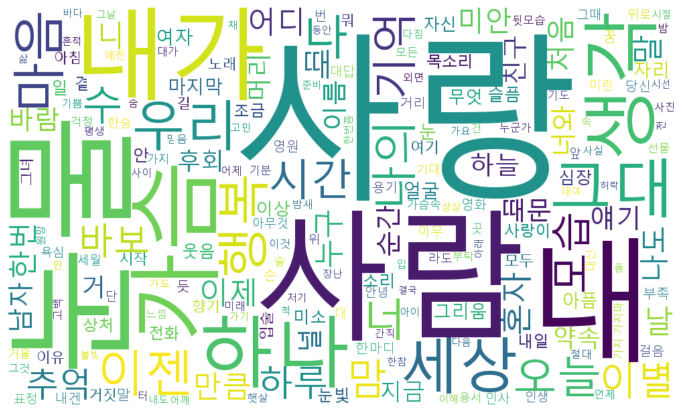

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
park

,year,rank,name,genre,lyricist,lyrics
3,2000,4,거짓말,발라드,박진영,미안해 난 니가 싫어졌어 우리 이만 헤어져 다른 여자가 생겼어 너보다 훨씬 좋은 실...
23,2001,4,또 한번 사랑은 가고,발라드,박진영,울고 있는 내 모습이 이 젠 항상 나만 이러는게 이젠 너무 지겨워서 너무 한심해서 ...
27,2001,8,길,발라드,박진영,내가 가는 이 길이 어디로 가는지 어디로 날 데려가는지 그곳은 어딘지 알 수 없지만...
97,2004,18,It's Raining,댄스,박진영,다시 올라선 무대 조명이 날 비추면 난 조금씩 사람들의 함성이 나의 이름을 불러주면...
155,2007,16,왼쪽가슴,발라드,박진영,그렇게 쉬울 줄 몰랐죠 나를 잊을 줄은 알았지만 그렇게 빠를 줄 몰랐죠 다른 사람 ...
160,2008,1,So Hot,댄스,박진영,왜 자꾸 쳐다보니 왜 내가 그렇게 예쁘니 아무리 그렇다고 그렇게 쳐다보면 내가 좀 ...
163,2008,4,Nobody,댄스,박진영,You Know I still Love You Baby And it will nev...
173,2008,14,이노래,발라드,박진영,예쁜 목걸이를 사주고 싶지만 멋진 차를 태워주고 싶지만 예쁜 옷을 입혀주고 싶지만 ...
184,2009,5,Again＆Again,댄스,박진영,Again and again and again and again Again and ...
200,2010,1,Bad Girl Good Girl,댄스,박진영,You don't know me You don't know me You don't ...


In [ ]:
list_nouns=[]

for i in song2:
    list_nouns=list_nouns +kkma.nouns(i)

In [ ]:
for i,v in enumerate(list_nouns):
    if len(v) < 2:
        list_nouns.pop(i)

In [ ]:
last_text=''

for i in list_nouns:
    last_text=last_text + " " + i

In [ ]:
import collections

collections.Counter(list_nouns).most_common(10)

[('사랑', 121),
 ('우리', 80),
 ('내', 69),
 ('내가', 66),
 ('생각', 59),
 ('시간', 56),
 ('나', 54),
 ('하나', 53),
 ('사람', 53),
 ('마음', 51)]

<function matplotlib.pyplot.show(*args, **kw)>

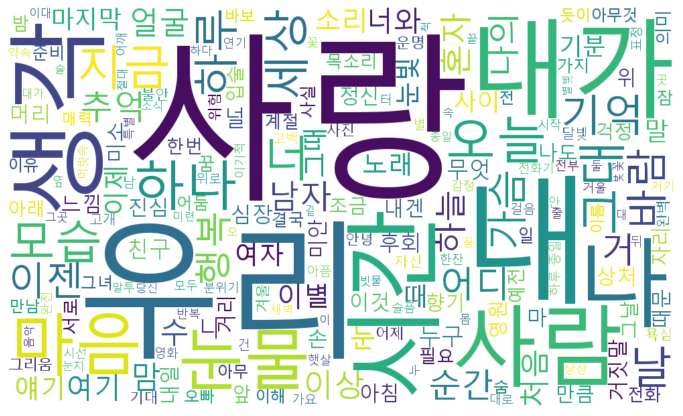

In [ ]:
font_path = '/content/drive/MyDrive/malgun.ttf'
wordcloud=WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path).generate(last_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
list_nouns=[]

for i in song3:
    list_nouns=list_nouns +kkma.nouns(i)

In [ ]:
for i,v in enumerate(list_nouns):
    if len(v) < 2:
        list_nouns.pop(i)

In [ ]:
last_text=''

for i in list_nouns:
    last_text=last_text + " " + i

In [ ]:
import collections

collections.Counter(list_nouns).most_common(10)

[('사랑', 6),
 ('내가', 5),
 ('나의', 4),
 ('눈물', 4),
 ('하나', 4),
 ('생각', 4),
 ('마음', 4),
 ('우리', 4),
 ('너', 3),
 ('하루', 3)]

<function matplotlib.pyplot.show>

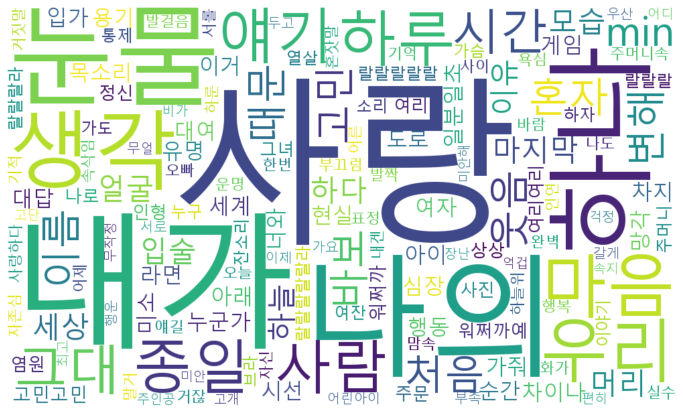

In [ ]:
font_path = '/content/drive/MyDrive/malgun.ttf'
wordcloud=WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path).generate(last_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
TEDDY

,year,rank,name,genre,lyricist,lyrics
181,2009,2,I Don't Care,댄스,"TEDDY, KUSH",hey playboy it's about time and your time's up...
187,2009,8,Fire,댄스,TEDDY,I go by the name of CL of 2NE1 It's been a lon...
189,2009,10,Lollipop,댄스,TEDDY,Lolli Lolli Oh Lollipop Lolli Lolli Oh Lolli L...
209,2010,10,Go Away,댄스,TEDDY,너무 치사하잖아 너답지 못하잖아 지금 적응이 안돼 어 어 어지러워 왜 누가 누구랑 ...
212,2010,13,Can't Nobody,댄스,TEDDY,갈만큼 가겠지 오늘밤도 길겠지 분위기 타겠지 졸졸 따라 올 테지 난 참 바쁜걸 I ...
221,2011,2,바람났어,댄스,"TEDDY, KUSH, G-DRAGON",Oh G-Dragon A-yo Great Park 뭐해요 딱히 오늘 파티있는데 같이...
222,2011,3,내가 제일 잘 나가,댄스,TEDDY,내가 제일 잘 나가 내가 제일 잘 나가 내가 제일 잘 나가 내가 제일 잘 나가 제 ...
226,2011,7,UGLY,댄스,TEDDY,밝게 웃어보지만 내 맘에 들지 않아 난 예쁘지 않아 아름답지 않아 Oh oh oh ...
236,2011,17,Lonely,발라드,TEDDY,지금 내가 하는 얘기 널 아프게 할지 몰라 아마 날 죽도록 미워하게 될 꺼야 내가 ...
245,2012,6,I Love You,댄스,TEDDY,그대 나에게만 잘해줘요 항상 나에게만 웃어줘요 I said Ooh 질투하게 하지 마...


In [ ]:
list_nouns=[]

for i in song4:
    list_nouns=list_nouns +kkma.nouns(i)

In [ ]:
for i,v in enumerate(list_nouns):
    if len(v) < 2:
        list_nouns.pop(i)

In [ ]:
last_text=''

for i in list_nouns:
    last_text=last_text + " " + i

In [ ]:
import collections

collections.Counter(list_nouns).most_common(10)

[('사랑', 8),
 ('꽃잎', 5),
 ('우리', 5),
 ('지금', 5),
 ('사람', 4),
 ('생각', 4),
 ('그대', 3),
 ('나', 3),
 ('걸음', 3),
 ('표정', 3)]

<function matplotlib.pyplot.show>

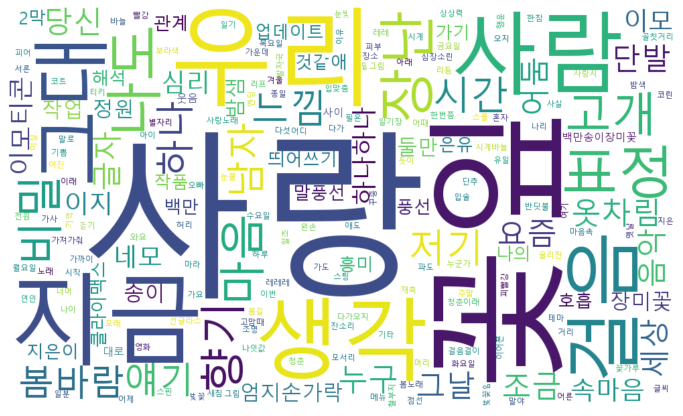

In [ ]:
font_path = '/content/drive/MyDrive/malgun.ttf'
wordcloud=WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path).generate(last_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
IU

,year,rank,name,genre,lyricist,lyrics
283,2014,4,금요일에 만나요,발라드,아이유,월요일엔 아마 바쁘지 않을까 화요일도 성급해 보이지 안 그래 수요일은 뭔가 어정쩡한...
285,2014,6,봄 사랑 벚꽃 말고,발라드,아이유,길었던 겨우내 줄곧 품이 좀 남는 밤색 코트 그 속에 나를 쏙 감추고 걸음을 재촉해...
311,2015,12,레옹,댄스,아이유,레레 레레레옹 레레레 레레레옹 레레레옹 레레 레레레 레레 눈에 띄게 흰 피부에 입술...
341,2017,2,밤편지,발라드,아이유,이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요 음 사랑한다는 말이에요 나 우리의...
346,2017,7,팔레트,R&B/Soul,아이유,이상하게도 요즘엔 그냥 쉬운 게 좋아 하긴 그래도 여전히 코린 음악은 좋더라 Hot...
405,2020,6,Blueming,록/메탈,아이유,‘뭐해‘라는 두 글자에 ‘네가 보고 싶어’ 나의 속마음을 담아 우 이모티콘 하나하나...
420,2021,1,Celebrity,댄스,아이유,"세상의 모서리 구부정하게 커버린 골칫거리 outsider 걸음걸이, 옷차림, 이어폰..."
424,2021,5,라일락,댄스,아이유,나리는 꽃가루에 눈이 따끔해 (아야) 눈물이 고여도 꾹 참을래 내 마음 한켠 비밀스...
428,2021,9,내 손을 잡아,발라드,아이유,느낌이 오잖아 떨리고 있잖아 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 피우지 ...
438,2021,19,Blueming,록/메탈,아이유,‘뭐해?‘라는 두 글자에 ‘네가 보고 싶어’ 나의 속마음을 담아 우 이모티콘 하나하...


In [ ]:
list_nouns=[]

for i in song5:
    list_nouns=list_nouns +kkma.nouns(i)

In [ ]:
for i,v in enumerate(list_nouns):
    if len(v) < 2:
        list_nouns.pop(i)

In [ ]:
last_text=''

for i in list_nouns:
    last_text=last_text + " " + i

In [ ]:
import collections

collections.Counter(list_nouns).most_common(10)

[('내가', 9),
 ('사랑', 8),
 ('지금', 7),
 ('나의', 7),
 ('남자', 7),
 ('세상', 6),
 ('하늘', 6),
 ('너와', 6),
 ('사람', 6),
 ('시간', 6)]

<function matplotlib.pyplot.show>

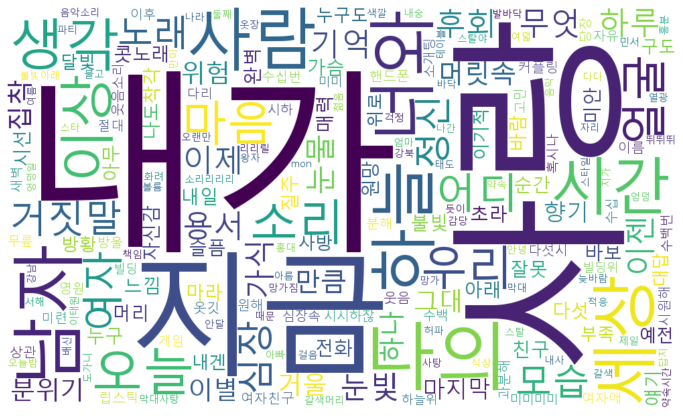

In [ ]:
font_path = '/content/drive/MyDrive/malgun.ttf'
wordcloud=WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path).generate(last_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
kim

,year,rank,name,genre,lyricist,lyrics
162,2008,3,Love,댄스,"미료, 김이나",야릇야릇한 널 향한 나의 맘 들리니 I need you I love you 이런이런...
177,2008,18,어쩌다,댄스,김이나,어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이 꼴이 됐는지 어쩌다 어쩌다 어...
182,2009,3,Abracadabra,댄스,"미료, 김이나",이러다 미쳐 내가 여리여리 착하던 그런 내가 너 때문에 돌아 내가 독한 나로 변해 ...
201,2010,2,잔소리,발라드,김이나,늦게 다니지좀 마 술은 멀리좀 해봐 열살짜리 애처럼 말을 안듣니 정말 웃음만 나와 ...
227,2011,8,좋은 날,댄스,김이나,어쩜 이렇게 하늘은 더 파란 건지 오늘따라 왜 바람은 또 완벽한지 그냥 모르는 척 ...
248,2012,9,하루 끝,댄스,김이나,Monday Better day 처음처럼 설레이는 그런 날 Sunday Better...
292,2014,13,그 중에 그대를 만나,발라드,김이나,그렇게 대단한 운명까진 바란적 없다 생각했는데 그대 하나 떠나간 내 하룬 이제 운명...
456,2022,17,이제 나만 믿어요,성인가요/트로트,김이나,무얼 믿은 걸까 부족했던 내게서 나조차 못 믿던 내게 여태 머문 사람 무얼 봤던 걸...


In [ ]:
list_nouns=[]

for i in song6:
    list_nouns=list_nouns +kkma.nouns(i)

In [ ]:
for i,v in enumerate(list_nouns):
    if len(v) < 2:
        list_nouns.pop(i)

In [ ]:
last_text=''

for i in list_nouns:
    last_text=last_text + " " + i

In [ ]:
import collections

collections.Counter(list_nouns).most_common(10)

[('사랑', 48),
 ('우리', 30),
 ('내', 30),
 ('하나', 24),
 ('내가', 24),
 ('나', 24),
 ('그대', 23),
 ('사람', 22),
 ('생각', 21),
 ('모습', 21)]

<function matplotlib.pyplot.show>

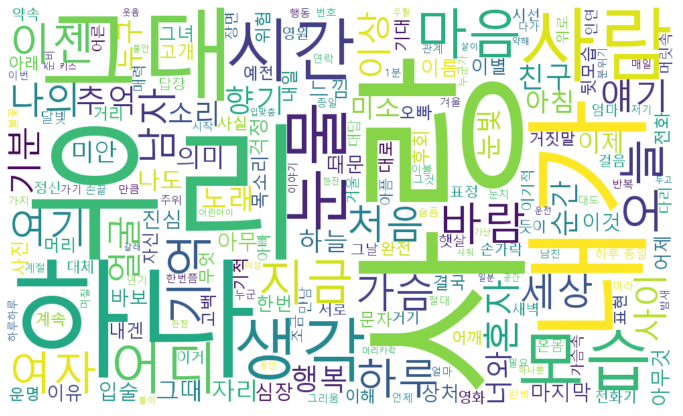

In [ ]:
font_path = '/content/drive/MyDrive/malgun.ttf'
wordcloud=WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path).generate(last_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
list_nouns=[]

for i in song7:
    list_nouns=list_nouns +kkma.nouns(i)

In [ ]:
for i,v in enumerate(list_nouns):
    if len(v) < 2:
        list_nouns.pop(i)

In [ ]:
last_text=''

for i in list_nouns:
    last_text=last_text + " " + i

In [ ]:
import collections

collections.Counter(list_nouns).most_common(10)

[('우리', 45),
 ('사랑', 42),
 ('시간', 28),
 ('내가', 27),
 ('생각', 23),
 ('내', 22),
 ('지금', 20),
 ('너', 20),
 ('마음', 19),
 ('사람', 18)]

<function matplotlib.pyplot.show>

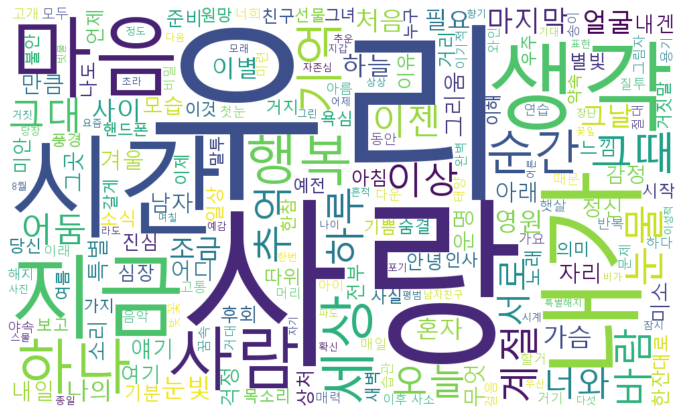

In [ ]:
font_path = '/content/drive/MyDrive/malgun.ttf'
wordcloud=WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path).generate(last_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
list_nouns=[]

for i in song8:
    list_nouns=list_nouns +kkma.nouns(i)

In [ ]:
for i,v in enumerate(list_nouns):
    if len(v) < 2:
        list_nouns.pop(i)

In [ ]:
last_text=''

for i in list_nouns:
    last_text=last_text + " " + i

In [ ]:
import collections

collections.Counter(list_nouns).most_common(10)

[('사랑', 23),
 ('우리', 17),
 ('사람', 14),
 ('생각', 12),
 ('시간', 11),
 ('내', 10),
 ('내가', 10),
 ('하나', 9),
 ('오늘', 9),
 ('눈물', 9)]

<function matplotlib.pyplot.show>

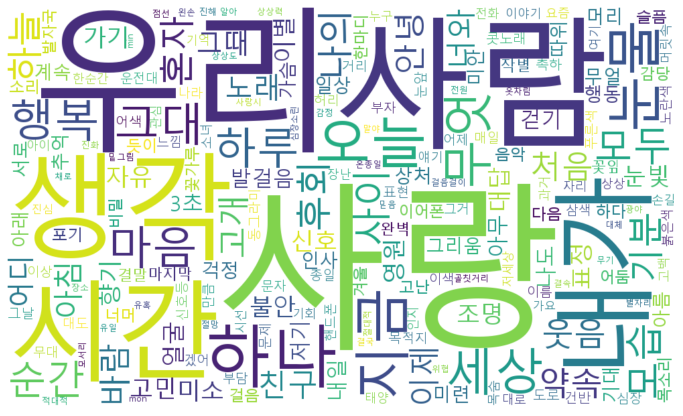

In [ ]:
font_path = '/content/drive/MyDrive/malgun.ttf'
wordcloud=WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path).generate(last_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [ ]:
genre1 = df1970['Genre']
genre2 = df1980['Genre']
genre3 = df1990['Genre']
#genre4 = df4['genre']
#genre5 = df5['genre']

In [ ]:
df1970['Genre'].value_counts()

성인가요/트로트         47
포크/블루스           30
발라드              13
록/메탈              5
발라드, 성인가요/트로트     1
Name: Genre, dtype: int64

In [ ]:
from matplotlib import font_manager, rc

font_path = "/content/drive/MyDrive/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()

In [ ]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_

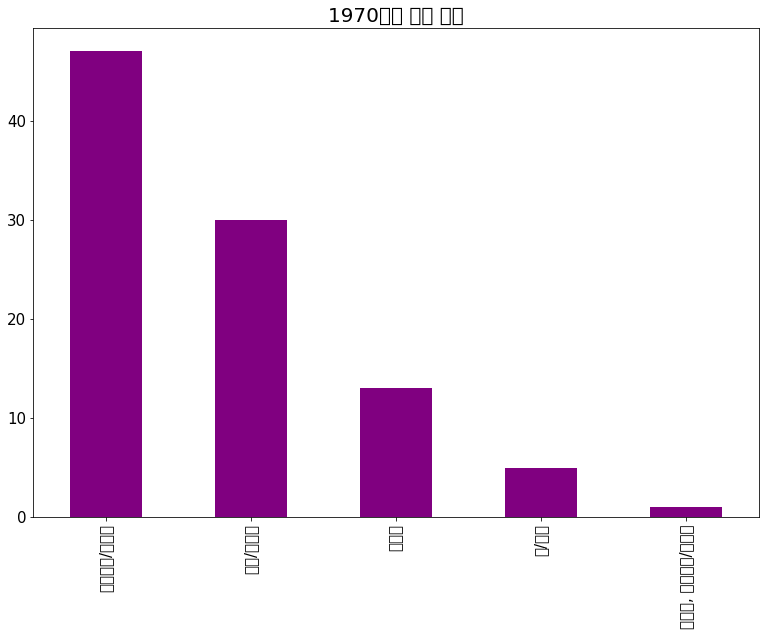

In [ ]:
plt.figure(figsize=(13,9))
plt.title("1970년대 장르 순위",fontsize=20)
plt.rc('font', family='NanumGothic')
df1970['Genre'].value_counts()[:5].plot(kind = 'bar',color='purple', fontsize=15)

In [ ]:
df1980['Genre'].value_counts()

발라드              32
성인가요/트로트         32
포크/블루스           17
록/메탈             10
댄스                6
발라드, 성인가요/트로트     2
발라드, 록/메탈         1
Name: Genre, dtype: int64

In [ ]:
df1990['Genre'].value_counts()

발라드            59
록/메탈           13
댄스             12
포크/블루스          7
성인가요/트로트        4
록/메탈, 국내영화      1
R&B/Soul        1
발라드, 국내영화       1
발라드, 포크/블루스     1
록/메탈, 국내드라마     1
Name: Genre, dtype: int64

In [ ]:
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in song1] #명사만 추출
final_result= [r for i in result for r in i if len(r) > 1]
print(final_result)

['그리움', '거리', '혼자', '미련', '때문', '세월', '얼굴', '이다지', '속눈썹', '정다웠던', '눈길', '목소리', '가슴', '가을비', '우산', '이슬', '맺힌다', '세월', '흐름', '혼자', '슬픔', '그리움', '혼자', '정다웠던', '눈길', '목소리', '가슴', '가을비', '우산', '이슬', '맺힌다', '바람', '제주', '인정', '마음씨', '아가씨', '감수', '감수', '감수', '설릉사', '서예', '겨울', '한라산', '당신', '사이', '한창', '감수', '감수', '감수', '설릉사', '서예', '어쩌다가', '다해', '혼자', '서예', '감수', '감수', '감수', '설릉사', '서예', '우리', '우리', '노래', '노래', '이마', '땀방울', '마음', '방울', '나무', '하늘', '개구쟁이', '우리', '우리', '노래', '노래', '이마', '땀방울', '마음', '방울', '나무', '하늘', '개구쟁이', '당신', '무슨', '일로', '홀로', '여울', '주저', '포기', '물이', '봄바람', '가도', '아주', '약속', '여울', '무엇', '생각', '가도', '아주', '굳이', '부탁', '인지', '가도', '아주', '약속', '여울', '무엇', '생각', '가도', '아주', '굳이', '부탁', '인지', '갈매기', '바닷가', '그대', '파도', '그대', '행복', '가득', '인생', '그대', '선물', '이세', '어디', '그대', '행복', '가득', '인생', '그대', '선물', '이세', '어디', '그대', '노래', '가슴', '하나', '가득', '슬픔', '무엇', '보아', '모두', '동해', '바다로', '완행열차', '기차', '타고', '간밤', '세계', '아침', '하나', '조그만', '고래', '마리', '동해', '바다로', '신화', '고래', '우리', '사랑', '다해

In [ ]:
korean = pd.Series(final_result).value_counts().head(10)
print("1970년대 한국어 top 10")
print(korean)

1970년대 한국어 top 10
사랑    130
마음     83
그대     63
사람     59
우리     39
당신     38
목화     32
정말     29
생각     27
스타     27
dtype: int64


In [ ]:
okt = Okt()
result =[]
result = [okt.nouns(i) for i in song2] #명사만 추출
final_result= [r for i in result for r in i if len(r) > 1]
print(final_result)

['당신', '당신', '누구', '외로움', '그냥', '스처', '타인', '가세', '그리움', '더욱', '가까이', '당신', '그냥', '타인', '가세', '그리움', '더욱', '가까이', '당신', '가나다', '라마', '바사', '차카', '타파', '헤이헤이', '노래', '십이', '헤이헤이', '이내', '팔이', '일엽편주', '마음', '웃음', '한번', '어기', '어기', '어기', '어기', '가슴', '한번', '다시', '하늘', '누루황', '헤이헤이', '진리', '이내', '머리', '작고', '일엽편주', '마음', '웃음', '한번', '태종', '태세', '중인', '헤이헤이', '인물', '이내', '다리', '갑자', '을축', '병인', '정묘', '무진', '기사', '신미', '헤이헤이', '순간', '세월', '일엽편주', '마음', '웃음', '한번', '어기', '어기', '어기', '어기', '저리', '뱅글', '뱅글', '뱅글', '다시', '다시', '자리', '중건', '곤지', '수뢰', '산수', '헤이', '헤이', '하늘', '보고', '보고', '여기저기', '보아', '세상만사', '일엽편주', '마음', '웃음', '한번', '일엽편주', '마음', '웃음', '한번', '크게', '밤별', '창문', '예전', '모습', '모든', '골목길', '그림자', '버려진', '사랑', '어쩌란', '마음', '어쩌란', '가슴', '어쩌란', '마음', '어쩌란', '가슴', '하나', '가득', '눈물', '고이', '세상', '모든', '슬픔', '가슴', '모습', '세상', '기쁨', '가슴', '뒷모습', '버려진', '사랑', '어쩌란', '마음', '어쩌란', '가슴', '어쩌란', '마음', '어쩌란', '가슴', '어쩌란', '마음', '어쩌란', '가슴', '어쩌란', '마음', '어쩌란', '가슴', '당신', '헛된', '바람', '당신', '어둠', '당신

In [ ]:
korean = pd.Series(final_result).value_counts().head(10)
print("1980년대 한국어 top 10")
print(korean)

1980년대 한국어 top 10
사랑    263
그대    189
마음    154
당신     84
가슴     76
바람     71
우리     57
사람     56
눈물     55
모습     45
dtype: int64


In [ ]:
okt = Okt()
result =[]
result = [okt.nouns(i) for i in song3] #명사만 추출
final_result= [r for i in result for r in i if len(r) > 1]
print(final_result)

['모든', '사랑', '당신', '웃음', '욕심', '미련', '당신', '시간', '약속', '그대', '웃음', '리도', '한지', '가지', '사이', '혼자', '그대', '기억', '사랑', '그대', '세상', '하나', '오직', '그대', '너마저', '비틀거릴', '안길', '어디', '가지', '사이', '혼자', '그대', '기억', '사랑', '그대', '세상', '하나', '오직', '그대', '너마저', '비틀거릴', '안길', '어디', '비틀거릴', '안길', '어디', '비틀거릴', '안길', '어디', '아침', '소리', '문득', '워워', '사랑', '항상', '어깨', '워워', '사랑', '우리', '이별', '때로는', '슬픔', '눈물', '하늘', '우리', '워워', '사랑', '항상', '어깨', '워워', '사랑', '우리', '이별', '때로는', '슬픔', '눈물', '하늘', '우리', '워워', '사랑', '사랑', '처음', '파란', '하늘빛', '미소', '지난', '시간', '세월', '얘기', '모습', '밀고', '역시', '웃음', '시간', '다시', '사랑', '가슴', '슬픔', '모두', '역시', '웃음', '시간', '다시', '사랑', '가슴', '슬픔', '모두', '그리움', '절실', '어려움', '사랑', '그리움', '절실', '아무', '노래', '양식', '아무', '암흑', '조그만', '다린', '노래', '노래', '씨앗', '내일', '결실', '아이', '읊음', '마음', '열매', '맺혔으', '노래', '노래', '거미줄', '상속', '바람', '나무', '가지', '상속', '마지막', '방울', '물이', '노래', '하리', '노래', '하리', '진리', '양심', '금문', '이웃', '웃음', '조그만', '가락', '노래', '마음', '그대', '모두', '노래', '멀리', '멀리', '노래', '멀리', '멀리', '저녁', 

In [ ]:
korean = pd.Series(final_result).value_counts().head(10)
print("1990년대 한국어 top 10")
print(korean)

1990년대 한국어 top 10
사랑    230
그대    144
마음     88
모습     84
우리     67
사람     62
눈물     60
이제     59
세상     56
다시     54
dtype: int64


In [ ]:
lyricist_Count = df.lyricist.value_counts()[:25]
lyricist_Count

박진영         15
안영민         11
TEDDY       11
아이유         10
조은희          9
이단옆차기        8
강은경          7
G-DRAGON     7
휘성           6
김이나          6
장범준          6
한경혜          5
안지영          5
심현보          5
최갑원          5
채정은          5
윤사라          5
전해성          4
방시혁          4
용감한 형제       4
서지음          4
이수           4
지코           3
류재현          3
김태훈          3
Name: lyricist, dtype: int64

In [ ]:
import platform
import matplotlib

print(platform.system()) # 플랫폼 확인

Linux


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans Display',
 'STIXGeneral',
 'cmex10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmr10',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'cmsy10',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'cmss10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'cmb10',
 'NanumGothic Eco',
 'NanumMyeongjo Eco',
 'NanumBarunpen',
 'NanumMyeongjo',
 'Liberation Sans Narrow',
 'NanumMyeongjo Eco',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Nanum Brush Script',
 'NanumSquare',
 'Liberation Serif',
 'Liberation Serif',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'Liberation Mono',
 'Liberation Sans',
 'Na

FileNotFoundError: ignored

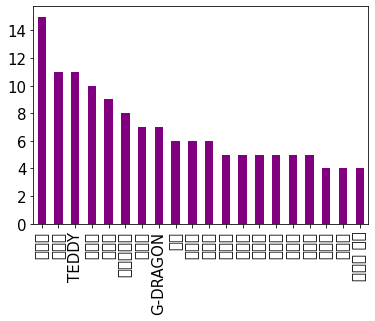

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
df['lyricist'].value_counts()[:20].plot(kind = 'bar',color='purple', fontsize=15)
fm._rebuild()

In [ ]:
nanum = fm.FontProperties(fname='/Library/Fonts/NanumSquareOTFB.otf')

In [ ]:
import seaborn as sns

plt.figure(figsize=(13,9))
plt.title("작사가 순위",fontsize=20, fontproperties = nanum)
#plt.rcParams['font.family'] = 'NanumGothic'
df['lyricist'].value_counts()[:20].plot(kind = 'bar',color='purple', fontsize=15)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9aaeac78c0> (for post_execute):


FileNotFoundError: ignored

FileNotFoundError: ignored

<Figure size 936x648 with 1 Axes>

In [ ]:
df['ly_count'] = df['lyrics'].str.split(" ").str.len()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


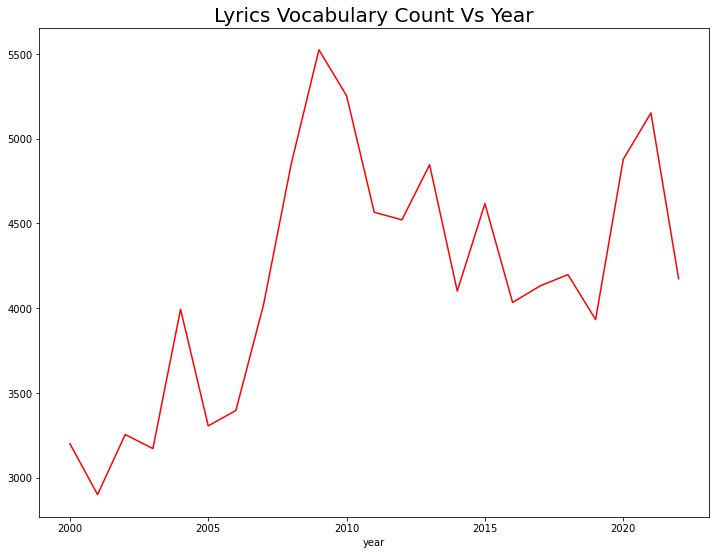

In [ ]:
Total_year_count = df.groupby(['year'])['ly_count'].sum()
plt.figure(figsize=(12,9))
plt.title("Lyrics Vocabulary Count Vs Year",fontsize=20)
Total_year_count.plot(kind='line',color="Red")

In [ ]:
filecombine['ly_count'] = filecombine['Lyrics'].str.split(" ").str.len()

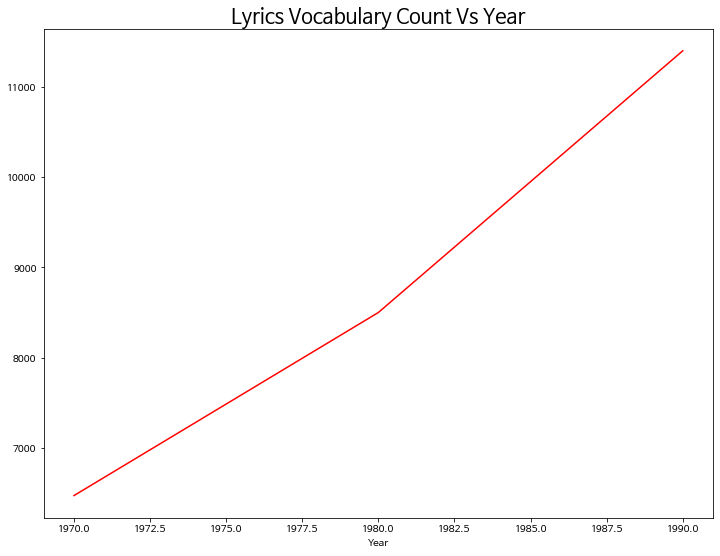

In [ ]:
Total_year_count = filecombine.groupby(['Year'])['ly_count'].sum()
plt.figure(figsize=(12,9))
plt.title("Lyrics Vocabulary Count Vs Year",fontsize=20)
Total_year_count.plot(kind='line',color="Red")

In [ ]:
df

,year,rank,name,genre,lyricist,lyrics,ly_count
0,2000,1,아시나요,발라드,강은경,아시나요 얼마나 사랑했는지 그댈 보면 자꾸 눈물이 나서 차마 그대 바라보지 못하고 ...,118
1,2000,2,다 줄거야,발라드,조규만,그대 내게 다가오는 그 모습 자꾸 다시 볼수 없을 것만 같아서 감은 두눈 뜨지 못한...,104
2,2000,3,Run To You,"댄스, 랩/힙합","이하늘, 정재용",하나 투 원 투 쓰리 포 BOUNCE with me BOUNCE with me BO...,336
3,2000,4,거짓말,발라드,박진영,미안해 난 니가 싫어졌어 우리 이만 헤어져 다른 여자가 생겼어 너보다 훨씬 좋은 실...,250
4,2000,5,초련,댄스,김창환,난 그냥 좋았어 니 앞에만 서면 요즘 내가 왜 이러는지 나도 몰라 니 생각만 하고 ...,236
...,...,...,...,...,...,...,...
455,2022,16,나의 X에게,발라드,"이래언, Rayker Dane, 신수윤",우리 다시 만날래 예쁘게 빛나던 모든 추억들이 너무 그리워 너의 품에 안길래 이 밤...,137
456,2022,17,이제 나만 믿어요,성인가요/트로트,김이나,무얼 믿은 걸까 부족했던 내게서 나조차 못 믿던 내게 여태 머문 사람 무얼 봤던 걸...,142
457,2022,18,듣고 싶을까,발라드,"DrJO, 원슈타인",우리 함께 듣던 그 노랠 듣고 싶을까 듣고 나서 잠시 날 생각은 할까 아주 혹시라도...,171
458,2022,19,무지개,록/메탈,"김시온, 멧돼지",오늘 하루 어땠었나요 많이 힘들었나요 쉬지 않고 달려왔던 길에서 나와 함께 쉬어가요...,157
